# Binary

Occorre fare il tuning di alpha_1 per ogni k diverso. In questo modo viene ottimizzato alpha_1 fissando k.

In [1]:
from sequence_distance_matrix import *
from import_data_encoded_knn import *
from sklearn.metrics import recall_score, roc_auc_score, precision_score, accuracy_score, mean_squared_error
from math import sqrt
from time import ctime

X_try, X_train, X_test, y_train, y_test, len_X_train = import_data_encoded(encoding = 'binary')

categorical = ['ring_number', "exposure_type", "conc1_type","species",'tripleBond', 'obs_duration_mean', 'doubleBond',
    'alone_atom_number', 'class', 'tax_order', 'family', 'genus', 'oh_count']

non_categorical =[ 'atom_number', 'bonds_number', 'Mol', 'MorganDensity', 'LogP']

In [4]:
def row_tab(X_try, categorical, non_categorical, len_X_train, a_ham, k, leaf_size):
    print(ctime())
    dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham)
    print(ctime())
    X_train_new = dist_matr[:len_X_train,:len_X_train]
    X_test_new = dist_matr[len_X_train:,:len_X_train]

    del dist_matr

    neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = k, leaf_size = leaf_size)
    neigh123.fit(X_train_new, y_train.ravel())
    y_pred = neigh123.predict(X_test_new)
    y_pred_train = neigh123.predict(X_train_new)


    acc_train = accuracy_score(y_train, y_pred_train)        
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    auc_train = roc_auc_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)

    acc_test = accuracy_score(y_pred, y_test)
    rmse_test = sqrt(mean_squared_error(y_pred, y_test))
    auc_test = roc_auc_score(y_pred, y_test)
    rec_test = recall_score(y_pred, y_test)
    prec_test = precision_score(y_pred, y_test)

    return pd.DataFrame(np.array([[acc_train, acc_test, rmse_train, rmse_test, auc_train, auc_test,
                                   rec_train, rec_test, prec_train, prec_test]]))

# K = 3

In [5]:
c = [0,0,0]
ham = np.logspace(-3, 0, 30) 

best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [3],
                                                    leaf_size = range(60,90,10))

Sun Aug  9 13:38:32 2020
START...
Computing Euclidean ...

 Sun Aug  9 13:38:38 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sun Aug  9 13:38:50 2020
Start CV...
New best params found! alpha:0.001, k:3, leaf:60,
                                                        acc:  0.886656, st.error:  0.001324815458847005,
                                                        rmse: 0.3366430754427764, st.error:  0.001964672773589412

 Sun Aug  9 13:39:40 2020
Adding Hamming 1 (Categorical)... alpha = 0.0012689610031679222
Sun Aug  9 13:39:51 2020
Start CV...
New best params found! alpha:0.0012689610031679222, k:3, leaf:60,
                                                        acc:  0.8871039999999999, st.error:  0.002496000000000012,
                                                        rmse: 0.33591704687489693, st.error:  0.003732881556127318
New best params found! alpha:0.0012689610031679222, k:3, leaf:70,
                                                        acc:  0.888768,

Con k = 3, si ha l'alpha ottimale = 0.005298316906283708 e leaf_size = 80

In [8]:
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham = 0.005298316906283708)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 3, leaf_size = 80)
neigh123.fit(X_train_new, y_train.ravel())
y_pred = neigh123.predict(X_test_new)
y_pred_train = neigh123.predict(X_train_new)


acc_train = accuracy_score(y_train, y_pred_train)        
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
auc_train = roc_auc_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)

acc_test = accuracy_score(y_pred, y_test)
rmse_test = sqrt(mean_squared_error(y_pred, y_test))
auc_test = roc_auc_score(y_pred, y_test)
rec_test = recall_score(y_pred, y_test)
prec_test = precision_score(y_pred, y_test)

tab_pre.loc['k = 3'] = [acc_train, acc_test, rmse_train, rmse_test, auc_train, auc_test,
                        rec_train, rec_test, prec_train,prec_test]

Tue Aug 11 21:47:31 2020
Tue Aug 11 21:53:20 2020


In [9]:
tab_pre.to_csv('dataset_prova/tabella_lavoro_precedente.csv')

# K = 7

In [3]:
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham = 0.4893900918477494)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 7, leaf_size = 60)
neigh123.fit(X_train_new, y_train.ravel())
y_pred = neigh123.predict(X_test_new)
y_pred_train = neigh123.predict(X_train_new)


acc_train = accuracy_score(y_train, y_pred_train)        
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
auc_train = roc_auc_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)

acc_test = accuracy_score(y_pred, y_test)
rmse_test = sqrt(mean_squared_error(y_pred, y_test))
auc_test = roc_auc_score(y_pred, y_test)
rec_test = recall_score(y_pred, y_test)
prec_test = precision_score(y_pred, y_test)

tab_pre.loc['k = 3'] = [acc_train, acc_test, rmse_train, rmse_test, auc_train, auc_test,
                        rec_train, rec_test, prec_train,prec_test]

tab_pre.to_csv('dataset_prova/tabella_lavoro_precedente.csv')

Tue Aug 11 22:09:59 2020
Tue Aug 11 22:13:44 2020


# K = 9

In [2]:
c = [0,0,0]
ham = np.logspace(-3, 0, 30) 

best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [9],
                                                    leaf_size = range(60,90,10))

Sun Aug  9 14:23:04 2020
START...
Computing Euclidean ...

 Sun Aug  9 14:23:10 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sun Aug  9 14:23:21 2020
Start CV...
New best params found! alpha:0.001, k:9, leaf:60,
                                                        acc:  0.8617600000000001, st.error:  0.0027768183231893285,
                                                        rmse: 0.371731322000788, st.error:  0.0037357811614987207
New best params found! alpha:0.001, k:9, leaf:80,
                                                        acc:  0.8632960000000001, st.error:  0.0016391998047828062,
                                                        rmse: 0.36970852774049917, st.error:  0.002213849359858379

 Sun Aug  9 14:24:10 2020
Adding Hamming 1 (Categorical)... alpha = 0.0012689610031679222
Sun Aug  9 14:24:21 2020
Start CV...

 Sun Aug  9 14:25:07 2020
Adding Hamming 1 (Categorical)... alpha = 0.0016102620275609393
Sun Aug  9 14:25:18 2020
Start CV...

 Sun Aug  9 

Con k = 9, si ha l'alpha ottimale = 0.4893900918477494 e leaf_size = 80

In [3]:
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham = 0.4893900918477494)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 9, leaf_size = 80)
neigh123.fit(X_train_new, y_train.ravel())
y_pred = neigh123.predict(X_test_new)
y_pred_train = neigh123.predict(X_train_new)


acc_train = accuracy_score(y_train, y_pred_train)        
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
auc_train = roc_auc_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)

acc_test = accuracy_score(y_pred, y_test)
rmse_test = sqrt(mean_squared_error(y_pred, y_test))
auc_test = roc_auc_score(y_pred, y_test)
rec_test = recall_score(y_pred, y_test)
prec_test = precision_score(y_pred, y_test)

tab_pre.loc['k = 9'] = [acc_train, acc_test, rmse_train, rmse_test, auc_train, auc_test,
                        rec_train, rec_test, prec_train,prec_test]
tab_pre.to_csv('dataset_prova/tabella_lavoro_precedente.csv')

Tue Aug 11 22:02:02 2020
Tue Aug 11 22:04:34 2020


# K = 21

In [2]:
c = [0,0,0]
ham = np.logspace(-3, 0, 30) 

best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [21],
                                                    leaf_size = range(60,90,10))

Sun Aug  9 15:03:36 2020
START...
Computing Euclidean ...

 Sun Aug  9 15:03:42 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sun Aug  9 15:03:53 2020
Start CV...
New best params found! alpha:0.001, k:21, leaf:60,
                                                        acc:  0.8391679999999999, st.error:  0.0035063006146079365,
                                                        rmse: 0.4009427954740855, st.error:  0.004383912562587436
New best params found! alpha:0.001, k:21, leaf:70,
                                                        acc:  0.840192, st.error:  0.003091935316270369,
                                                        rmse: 0.3996851452612492, st.error:  0.0038660269494056915

 Sun Aug  9 15:04:41 2020
Adding Hamming 1 (Categorical)... alpha = 0.0012689610031679222
Sun Aug  9 15:04:53 2020
Start CV...
New best params found! alpha:0.0012689610031679222, k:21, leaf:80,
                                                        acc:  0.8426879999999999, s

In [2]:
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham = 0.6210169418915616)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 21, leaf_size = 70)
neigh123.fit(X_train_new, y_train.ravel())
y_pred = neigh123.predict(X_test_new)

print('Model: {}, \n Accuracy: {},\n RMSE: {}'.format(neigh123,
                                                      accuracy_score(y_test, y_pred),
                                                      sqrt(mean_squared_error(y_test, y_pred))))
print('AUC: {}, Recall:{}, Precision: {}'.format(roc_auc_score(y_test, y_pred),
                                                 recall_score(y_test, y_pred),
                                                precision_score(y_test, y_pred)))

Sun Aug  9 15:40:11 2020
Sun Aug  9 15:41:35 2020
Model: KNeighborsClassifier(algorithm='auto', leaf_size=70, metric='precomputed',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform'), 
 Accuracy: 0.8456541509679095,
 RMSE: 0.3928687427527041
AUC: 0.8322051688033097, Recall:0.8814285714285715, Precision: 0.8767762890783597


# K = 51

In [2]:
c = [0,0,0]
ham = np.logspace(-3, 0, 30) 

best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [51],
                                                    leaf_size = range(60,90,10))

Sun Aug  9 15:47:36 2020
START...
Computing Euclidean ...

 Sun Aug  9 15:47:42 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sun Aug  9 15:47:53 2020
Start CV...
New best params found! alpha:0.001, k:51, leaf:60,
                                                        acc:  0.803392, st.error:  0.004508026619264802,
                                                        rmse: 0.4432867713354066, st.error:  0.005119530228226741
New best params found! alpha:0.001, k:51, leaf:70,
                                                        acc:  0.803904, st.error:  0.0036053648913806193,
                                                        rmse: 0.4427530549516764, st.error:  0.0040537738885475265

 Sun Aug  9 15:48:41 2020
Adding Hamming 1 (Categorical)... alpha = 0.0012689610031679222
Sun Aug  9 15:48:52 2020
Start CV...
New best params found! alpha:0.0012689610031679222, k:51, leaf:60,
                                                        acc:  0.8068480000000001, st.error:  

Sun Aug  9 16:16:25 2020
Start CV...


In [3]:
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham = 0.7880462815669912)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 51, leaf_size = 80)
neigh123.fit(X_train_new, y_train.ravel())
y_pred = neigh123.predict(X_test_new)

print('Model: {}, \n Accuracy: {},\n RMSE: {}'.format(neigh123,
                                                      accuracy_score(y_test, y_pred),
                                                      sqrt(mean_squared_error(y_test, y_pred))))
print('AUC: {}, Recall:{}, Precision: {}'.format(roc_auc_score(y_test, y_pred),
                                                 recall_score(y_test, y_pred),
                                                precision_score(y_test, y_pred)))

Sun Aug  9 16:18:52 2020
Sun Aug  9 16:24:12 2020
Model: KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='precomputed',
                     metric_params=None, n_jobs=None, n_neighbors=51, p=2,
                     weights='uniform'), 
 Accuracy: 0.8208392880342991,
 RMSE: 0.42327380259791764
AUC: 0.8041992149022641, Recall:0.8651020408163266, Precision: 0.8551543272140407


# Lo faccio con k = 5,7,11,13,15,17,19,23,31,41

In [2]:
k_try = [5,7,11,13,15,17,19,23,31,41]

c = [0,0,0]
ham = np.logspace(-3, 0, 30) 
for i in k_try:
    print('K = ', i)
    print(ctime())
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i],
                                                    leaf_size = range(60,90,10))
    print(ctime())
    print('Con a_ham = {}, best_leaf = {}'.format(best_alpha, best_leaf))

K =  5
Mon Aug 10 22:28:15 2020
Mon Aug 10 22:28:15 2020
START...
Mon Aug 10 22:28:34 2020
New best params found! alpha:0.001, k:5, leaf:60,
                                                        acc:  0.8748799999999999, st.error:  0.0031402420288888684,
                                                        rmse: 0.35360967024627976, st.error:  0.004477753575099796
New best params found! alpha:0.001, k:5, leaf:70,
                                                        acc:  0.87712, st.error:  0.004337151138708436,
                                                        rmse: 0.3503264087897008, st.error:  0.006152383776055584
New best params found! alpha:0.001, k:5, leaf:80,
                                                        acc:  0.8773120000000001, st.error:  0.00317203783079584,
                                                        rmse: 0.3501525841464201, st.error:  0.004504659132059548
Mon Aug 10 22:29:40 2020
Mon Aug 10 22:30:43 2020
Mon Aug 10 22:31:46 2020
New bes

New best params found! alpha:0.3039195382313198, k:11, leaf:80,
                                                        acc:  0.8615039999999998, st.error:  0.0027553468021285377,
                                                        rmse: 0.3720772079041484, st.error:  0.0036929445654233844
Mon Aug 10 23:53:01 2020
New best params found! alpha:0.38566204211634725, k:11, leaf:60,
                                                        acc:  0.8631679999999999, st.error:  0.0037463240650002483,
                                                        rmse: 0.3697716377047459, st.error:  0.005023344233429343
Mon Aug 10 23:54:01 2020
New best params found! alpha:0.4893900918477494, k:11, leaf:70,
                                                        acc:  0.8645120000000001, st.error:  0.0014007083922073116,
                                                        rmse: 0.3680671680548125, st.error:  0.0019078653064659304
Mon Aug 10 23:55:00 2020
Mon Aug 10 23:56:00 2020
Mon Aug 10 23:5

Tue Aug 11 00:54:45 2020
Tue Aug 11 00:55:44 2020
New best params found! alpha:0.7880462815669912, k:15, leaf:80,
                                                        acc:  0.855552, st.error:  0.0013748832677722112,
                                                        rmse: 0.3800460668218211, st.error:  0.0018018804943659983
Tue Aug 11 00:56:44 2020
Tue Aug 11 00:57:32 2020
Con a_ham = 0.7880462815669912, best_leaf = 80
K =  17
Tue Aug 11 00:57:32 2020
Tue Aug 11 00:57:32 2020
START...
Tue Aug 11 00:57:49 2020
New best params found! alpha:0.001, k:17, leaf:60,
                                                        acc:  0.8432639999999999, st.error:  0.0030965684232711413,
                                                        rmse: 0.39582063445749893, st.error:  0.003937808326436813
New best params found! alpha:0.001, k:17, leaf:70,
                                                        acc:  0.844288, st.error:  0.0040383442151456185,
                                     

Tue Aug 11 01:57:18 2020
New best params found! alpha:0.001, k:23, leaf:60,
                                                        acc:  0.836608, st.error:  0.0033326121886592284,
                                                        rmse: 0.40413320019153814, st.error:  0.004133899579879303
New best params found! alpha:0.001, k:23, leaf:70,
                                                        acc:  0.836928, st.error:  0.0029685929326871393,
                                                        rmse: 0.4037548440149263, st.error:  0.003675116817276987
Tue Aug 11 01:58:19 2020
New best params found! alpha:0.0012689610031679222, k:23, leaf:60,
                                                        acc:  0.83776, st.error:  0.002589826248998197,
                                                        rmse: 0.4027391969906816, st.error:  0.003206992645025751
New best params found! alpha:0.0012689610031679222, k:23, leaf:80,
                                                       

Tue Aug 11 02:50:57 2020
New best params found! alpha:0.3039195382313198, k:31, leaf:60,
                                                        acc:  0.8287359999999999, st.error:  0.0035968341635388254,
                                                        rmse: 0.41375051617966774, st.error:  0.0043159692149777286
New best params found! alpha:0.3039195382313198, k:31, leaf:70,
                                                        acc:  0.8298880000000001, st.error:  0.0026321823645028743,
                                                        rmse: 0.41239730578880385, st.error:  0.003180494385145498
Tue Aug 11 02:51:56 2020
New best params found! alpha:0.38566204211634725, k:31, leaf:60,
                                                        acc:  0.831936, st.error:  0.0028014167844146167,
                                                        rmse: 0.4098996861161132, st.error:  0.0034002691772807942
Tue Aug 11 02:52:55 2020
New best params found! alpha:0.4893900918477494,

New best params found! alpha:1.0, k:41, leaf:80,
                                                        acc:  0.828352, st.error:  0.0044197085876786,
                                                        rmse: 0.41416211768383315, st.error:  0.0054254095615620095
Tue Aug 11 03:26:25 2020
Con a_ham = 1.0, best_leaf = 80


k = 1  -->  a_ham = 0.0016102620275609393, best_leaf = 70

k = 3  -->  a_ham = 0.005298316906283708, best_leaf = 80

k = 5  -->  a_ham = 0.01373823795883263, best_leaf = 60

k = 7  -->  a_ham = 0.4893900918477494, best_leaf = 60

k = 9  -->  a_ham = 0.4893900918477494, best_leaf = 80

k = 11 -->  a_ham = 0.4893900918477494, best_leaf = 70

k = 13 -->  a_ham = 0.4893900918477494, best_leaf = 70

k = 15 -->  a_ham = 0.7880462815669912, best_leaf = 80

k = 17 -->  a_ham = 0.7880462815669912, best_leaf = 80

k = 19 -->  a_ham = 0.6210169418915616, best_leaf = 70

k = 21 -->  a_ham = 0.6210169418915616, best_leaf = 70

k = 23 -->  a_ham = 0.4893900918477494, best_leaf = 70

*da vedere*

k = 31 -->  a_ham = 0.7880462815669912, best_leaf = 80

k = 41 -->  a_ham = 1.0, best_leaf = 80

k = 51 -->  a_ham = 0.7880462815669912, best_leaf = 80

Text(0, 0.5, 'alpha_1')

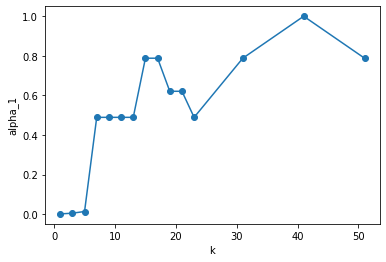

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

k = [1,3,5,7,9,11,13,15,17,19,21,23,31,41,51]
alpha = [0.0016102620275609393, 0.005298316906283708, 0.01373823795883263, 0.4893900918477494, 
         0.4893900918477494, 0.4893900918477494, 0.4893900918477494, 0.7880462815669912,
         0.7880462815669912, 0.6210169418915616, 0.6210169418915616, 0.4893900918477494,
         0.7880462815669912, 1.0, 0.7880462815669912]

plt.plot(k,alpha, '-o')
plt.xlabel('k')
plt.ylabel('alpha_1')

# K = 5

In [7]:
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham = 0.01373823795883263)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 5, leaf_size = 60)
neigh123.fit(X_train_new, y_train.ravel())
y_pred = neigh123.predict(X_test_new)
y_pred_train = neigh123.predict(X_train_new)


acc_train = accuracy_score(y_train, y_pred_train)        
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
auc_train = roc_auc_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)

acc_test = accuracy_score(y_pred, y_test)
rmse_test = sqrt(mean_squared_error(y_pred, y_test))
auc_test = roc_auc_score(y_pred, y_test)
rec_test = recall_score(y_pred, y_test)
prec_test = precision_score(y_pred, y_test)

Tue Aug 11 21:33:50 2020
Tue Aug 11 21:36:05 2020


### Grafico Binary

In [6]:
ks = [1,3,5,7,9,11,13,15,17,19,21,23,31,41,51]
alphas = [0.0016102620275609393, 0.005298316906283708, 0.01373823795883263, 0.4893900918477494, 
         0.4893900918477494, 0.4893900918477494, 0.4893900918477494, 0.7880462815669912,
         0.7880462815669912, 0.6210169418915616, 0.6210169418915616, 0.4893900918477494,
         0.7880462815669912, 1.0, 0.7880462815669912]

leafs = [70,80,60,60,80,70, 70,80,80,70,70,70,80,80,80]

a = pd.DataFrame()
# tab_pre = pd.DataFrame(columns = ['acc_train','acc_test', 'rmse_train', 'rmse_test', 'auc_train', 'auc_test',
#                             'recall_train', 'recall_test', 'precision_train', 'precision_test'],
#                 index = ['k = ' + str(k) for k in ks])

# Con funzione

In [7]:
for i in range(0,15):
    print(i, end = ' ')
    rt = row_tab(X_try, categorical, non_categorical, len_X_train, alphas[i], ks[i], leafs[i])
    
    a = pd.concat([a, rt], axis = 0)
    print(a)
    

0 Wed Aug 12 10:51:47 2020
Wed Aug 12 10:54:10 2020
         0         1         2         3         4       5         6  \
0  0.99872  0.904898  0.035777  0.308386  0.998482  0.8961  0.999391   

          7         8         9  
0  0.930045  0.998581  0.919796  
1 Wed Aug 12 10:55:20 2020
Wed Aug 12 10:57:17 2020
          0         1         2         3         4         5         6  \
0  0.998720  0.904898  0.035777  0.308386  0.998482  0.896100  0.999391   
0  0.948032  0.893985  0.227965  0.325600  0.943532  0.884063  0.960735   

          7         8         9  
0  0.930045  0.998581  0.919796  
0  0.923125  0.957045  0.909184  
2 Wed Aug 12 10:57:40 2020
Wed Aug 12 10:58:59 2020
          0         1         2         3         4         5         6  \
0  0.998720  0.904898  0.035777  0.308386  0.998482  0.896100  0.999391   
0  0.948032  0.893985  0.227965  0.325600  0.943532  0.884063  0.960735   
0  0.925824  0.882941  0.272353  0.342138  0.917555  0.873632  0.949168   

  

11 Wed Aug 12 11:31:04 2020
Wed Aug 12 11:32:12 2020
          0         1         2         3         4         5         6  \
0  0.998720  0.904898  0.035777  0.308386  0.998482  0.896100  0.999391   
0  0.948032  0.893985  0.227965  0.325600  0.943532  0.884063  0.960735   
0  0.925824  0.882941  0.272353  0.342138  0.917555  0.873632  0.949168   
0  0.909056  0.874497  0.301569  0.354265  0.899412  0.864514  0.936282   
0  0.899328  0.867611  0.317289  0.363853  0.887891  0.856817  0.931615   
0  0.893120  0.865662  0.326925  0.366522  0.881389  0.854792  0.926238   
0  0.884992  0.859166  0.339128  0.375279  0.871855  0.847865  0.922078   
0  0.880000  0.857867  0.346410  0.377006  0.865490  0.846969  0.920962   
0  0.875008  0.855528  0.353542  0.380095  0.860779  0.844362  0.915179   
0  0.870208  0.847993  0.360267  0.389881  0.856507  0.836032  0.908888   
0  0.866112  0.845654  0.365907  0.392869  0.852146  0.833552  0.905540   
0  0.862464  0.841497  0.370858  0.398125  0.84

In [9]:
a.to_csv('dataset_prova/tabella_lavoro_precedente.csv')

In [12]:
a.index = ['k = ' + str(i) for i in ks]

In [14]:
a.columns = ['acc_train','acc_test','rmse_train','rmse_test','auc_train','auc_test',
             'recall_train','recall_test','precision_train','precision_test']
a

,acc_train,acc_test,rmse_train,rmse_test,auc_train,auc_test,recall_train,recall_test,precision_train,precision_test
k = 1,0.998720,0.904898,0.035777,0.308386,0.998482,0.896100,0.999391,0.930045,0.998581,0.919796
k = 3,0.948032,0.893985,0.227965,0.325600,0.943532,0.884063,0.960735,0.923125,0.957045,0.909184
k = 5,0.925824,0.882941,0.272353,0.342138,0.917555,0.873632,0.949168,0.907479,0.934285,0.908776
k = 7,0.909056,0.874497,0.301569,0.354265,0.899412,0.864514,0.936282,0.900774,0.920866,0.902245
k = 9,0.899328,0.867611,0.317289,0.363853,0.887891,0.856817,0.931615,0.896587,0.910822,0.895306
k = 11,0.893120,0.865662,0.326925,0.366522,0.881389,0.854792,0.926238,0.894651,0.906374,0.894286
k = 13,0.884992,0.859166,0.339128,0.375279,0.871855,0.847865,0.922078,0.889070,0.898290,0.889796
k = 15,0.880000,0.857867,0.346410,0.377006,0.865490,0.846969,0.920962,0.885535,0.892264,0.892041
k = 17,0.875008,0.855528,0.353542,0.380095,0.860779,0.844362,0.915179,0.884023,0.889810,0.889796
k = 19,0.870208,0.847993,0.360267,0.389881,0.856507,0.836032,0.908888,0.878911,0.887986,0.882857


Text(0.5, 1.0, 'Precision')

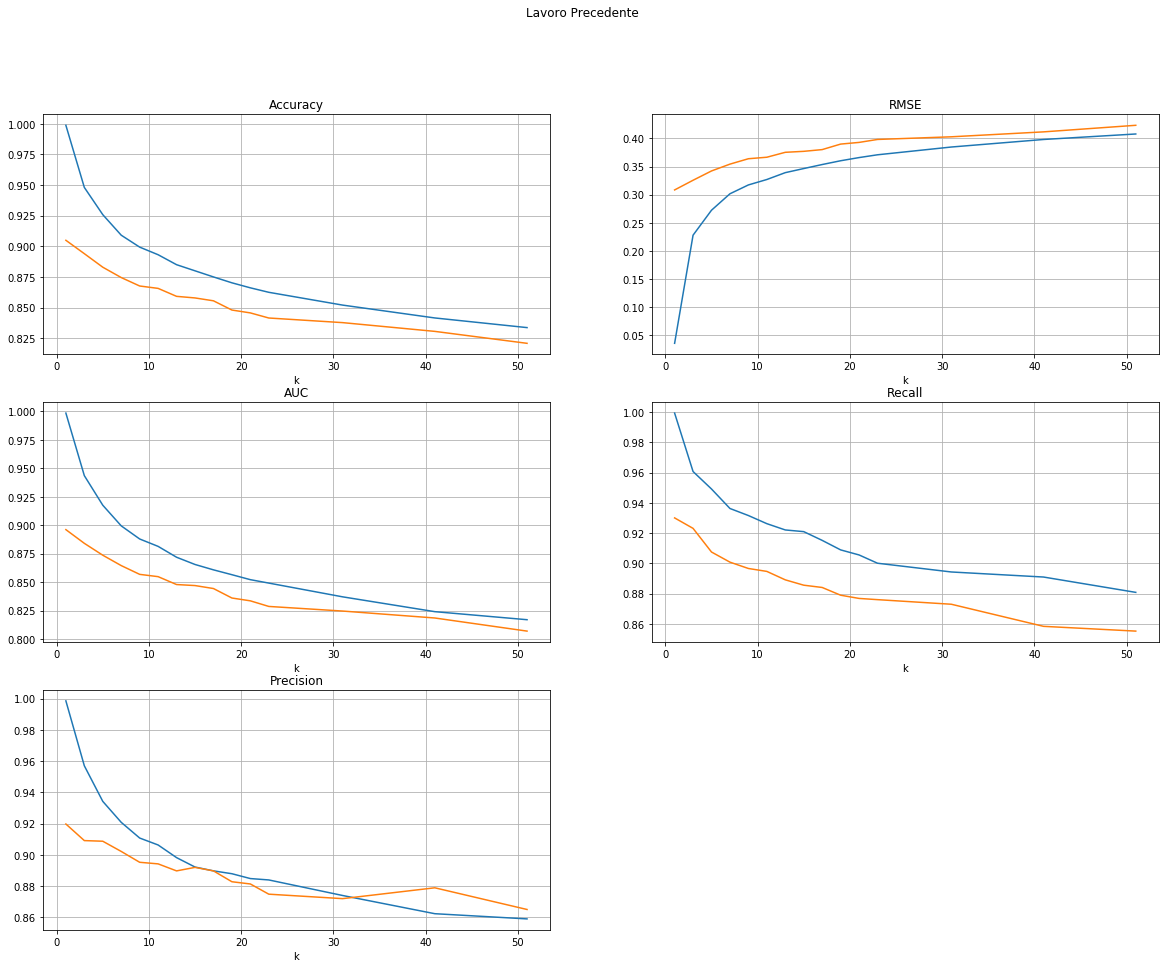

In [44]:
k = ks
table = a

plt.figure(figsize = [20,15])
plt.subplot(3,2,1)
plt.suptitle('Lavoro Precedente')

plt.plot(k, table.acc_train)
plt.plot(k, table.acc_test)
plt.grid()
plt.xlabel('k')
plt.title('Accuracy')

plt.subplot(3,2,2)
plt.plot(k,table.rmse_train)
plt.plot(k,table.rmse_test)
plt.grid()
plt.xlabel('k')
plt.title('RMSE')

plt.subplot(3,2,3)
plt.plot(k, table.auc_train)
plt.plot(k, table.auc_test)
plt.grid()
plt.xlabel('k')
plt.title('AUC')

plt.subplot(3,2,4)
plt.plot(k, table.recall_train)
plt.plot(k, table.recall_test)
plt.grid()
plt.xlabel('k')
plt.title('Recall')

plt.subplot(3,2,5)
plt.plot(k, table.precision_train)
plt.plot(k, table.precision_test)
plt.grid()
plt.xlabel('k')
plt.title('Precision')

# MULTICLASSE

In [1]:
from sequence_distance_matrix import *
from import_data_encoded_knn import *
from sklearn.metrics import recall_score, roc_auc_score, precision_score, accuracy_score, mean_squared_error
from math import sqrt
from time import ctime

X_try, X_train, X_test, y_train, y_test, len_X_train = import_data_encoded(encoding = 'multiclass')

categorical = ['ring_number', "exposure_type", "conc1_type","species",'tripleBond', 'obs_duration_mean', 'doubleBond',
    'alone_atom_number', 'class', 'tax_order', 'family', 'genus', 'oh_count']

non_categorical =[ 'atom_number', 'bonds_number', 'Mol', 'MorganDensity', 'LogP']

In [2]:
def row_tab(X_try, categorical, non_categorical, len_X_train, a_ham, k, leaf_size):
    print(ctime())
    dist_matr = basic_matrix(X_try, categorical, non_categorical, a_ham)
    print(ctime())
    X_train_new = dist_matr[:len_X_train,:len_X_train]
    X_test_new = dist_matr[len_X_train:,:len_X_train]

    del dist_matr

    neigh123 = KNeighborsClassifier(metric = 'precomputed', n_neighbors = k, leaf_size = leaf_size)
    neigh123.fit(X_train_new, y_train.ravel())
    y_pred = neigh123.predict(X_test_new)
    y_pred_train = neigh123.predict(X_train_new)


    acc_train = accuracy_score(y_train, y_pred_train)        
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    
    acc_test = accuracy_score(y_pred, y_test)
    rmse_test = sqrt(mean_squared_error(y_pred, y_test))
    
    return pd.DataFrame(np.array([[acc_train, acc_test, rmse_train, rmse_test]]))

In [4]:
k_try = [3,5,7,9,11,13,15,17,19,21,23,31,41,51]

c = [0,0,0]
ham = np.logspace(-3, 0, 20) 
for i in k_try:
    print('K = ', i)
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i])
    print('Con a_ham = {}, best_leaf = {}'.format(best_alpha, best_leaf))

K =  3
Wed Aug 12 12:21:23 2020

 Wed Aug 12 12:21:29 2020
Wed Aug 12 12:21:40 2020
New best params found! alpha:0.001, k:3, leaf:60,
                                                        acc:  0.680064, st.error:  0.003581141717385673,
                                                        rmse: 0.8083894396086688, st.error:  0.004316072554494925

 Wed Aug 12 12:22:23 2020
Wed Aug 12 12:22:34 2020

 Wed Aug 12 12:23:16 2020
Wed Aug 12 12:23:28 2020

 Wed Aug 12 12:24:13 2020
Wed Aug 12 12:24:24 2020

 Wed Aug 12 12:25:06 2020
Wed Aug 12 12:25:18 2020

 Wed Aug 12 12:26:01 2020
Wed Aug 12 12:26:14 2020

 Wed Aug 12 12:26:58 2020
Wed Aug 12 12:27:09 2020

 Wed Aug 12 12:27:53 2020
Wed Aug 12 12:28:03 2020
New best params found! alpha:0.012742749857031334, k:3, leaf:80,
                                                        acc:  0.681216, st.error:  0.0022771771999561194,
                                                        rmse: 0.8075409306330206, st.error:  0.00504096598766353

Wed Aug 12 13:18:19 2020
New best params found! alpha:0.001, k:9, leaf:60,
                                                        acc:  0.618752, st.error:  0.0025046005669567247,
                                                        rmse: 0.8971566690078376, st.error:  0.0030786058030161643
New best params found! alpha:0.001, k:9, leaf:70,
                                                        acc:  0.6216320000000001, st.error:  0.0054339731320646005,
                                                        rmse: 0.899099919194499, st.error:  0.006988120356099009
New best params found! alpha:0.001, k:9, leaf:80,
                                                        acc:  0.622016, st.error:  0.0035668159470317456,
                                                        rmse: 0.8956206133826944, st.error:  0.006475277677563046

 Wed Aug 12 13:19:05 2020
Wed Aug 12 13:19:16 2020

 Wed Aug 12 13:20:03 2020
Wed Aug 12 13:20:14 2020

 Wed Aug 12 13:21:00 2020
Wed Aug 12 13:21:12 2020

New best params found! alpha:0.6951927961775606, k:11, leaf:70,
                                                        acc:  0.6238079999999999, st.error:  0.004471534859530896,
                                                        rmse: 0.8908132724642392, st.error:  0.01043687694611133

 Wed Aug 12 13:55:43 2020
Wed Aug 12 13:55:54 2020
Con a_ham = 0.6951927961775606, best_leaf = 70
K =  13
Wed Aug 12 13:56:43 2020

 Wed Aug 12 13:56:49 2020
Wed Aug 12 13:57:01 2020
New best params found! alpha:0.001, k:13, leaf:60,
                                                        acc:  0.6005119999999999, st.error:  0.004344935442558382,
                                                        rmse: 0.9368689281951138, st.error:  0.0030253670247869765
New best params found! alpha:0.001, k:13, leaf:70,
                                                        acc:  0.6006400000000001, st.error:  0.0029899030084603187,
                                                        rmse: 0.941668395758

New best params found! alpha:0.6951927961775606, k:15, leaf:60,
                                                        acc:  0.606592, st.error:  0.004738377781477545,
                                                        rmse: 0.9218760046007939, st.error:  0.005670805526490168

 Wed Aug 12 14:34:25 2020
Wed Aug 12 14:34:36 2020
Con a_ham = 0.6951927961775606, best_leaf = 60
K =  17
Wed Aug 12 14:35:23 2020

 Wed Aug 12 14:35:29 2020
Wed Aug 12 14:35:41 2020
New best params found! alpha:0.001, k:17, leaf:60,
                                                        acc:  0.5865600000000001, st.error:  0.0048593662138184165,
                                                        rmse: 0.9727100762862448, st.error:  0.007125789275713677

 Wed Aug 12 14:36:27 2020
Wed Aug 12 14:36:38 2020

 Wed Aug 12 14:37:26 2020
Wed Aug 12 14:37:37 2020
New best params found! alpha:0.00206913808111479, k:17, leaf:70,
                                                        acc:  0.5873280000000001, s


 Wed Aug 12 15:15:47 2020
Wed Aug 12 15:15:58 2020
New best params found! alpha:0.0014384498882876629, k:21, leaf:60,
                                                        acc:  0.5776000000000001, st.error:  0.0028567954074451983,
                                                        rmse: 0.9972762276468641, st.error:  0.01743649742953011
New best params found! alpha:0.0014384498882876629, k:21, leaf:80,
                                                        acc:  0.578112, st.error:  0.003043534787052708,
                                                        rmse: 0.9925712836346692, st.error:  0.008280200840337497

 Wed Aug 12 15:16:43 2020
Wed Aug 12 15:16:55 2020

 Wed Aug 12 15:17:42 2020
Wed Aug 12 15:17:53 2020

 Wed Aug 12 15:18:38 2020
Wed Aug 12 15:18:49 2020

 Wed Aug 12 15:19:35 2020
Wed Aug 12 15:19:47 2020

 Wed Aug 12 15:20:32 2020
Wed Aug 12 15:20:44 2020

 Wed Aug 12 15:21:31 2020
Wed Aug 12 15:21:41 2020

 Wed Aug 12 15:22:27 2020
Wed Aug 12 15:22:38 2020

 


 Wed Aug 12 16:02:29 2020
Wed Aug 12 16:02:41 2020

 Wed Aug 12 16:03:26 2020
Wed Aug 12 16:03:38 2020

 Wed Aug 12 16:04:26 2020
Wed Aug 12 16:04:37 2020

 Wed Aug 12 16:05:21 2020
Wed Aug 12 16:05:32 2020

 Wed Aug 12 16:06:19 2020
Wed Aug 12 16:06:30 2020

 Wed Aug 12 16:07:16 2020
Wed Aug 12 16:07:28 2020

 Wed Aug 12 16:08:15 2020
Wed Aug 12 16:08:26 2020
New best params found! alpha:0.23357214690901212, k:31, leaf:60,
                                                        acc:  0.557504, st.error:  0.003595410407728163,
                                                        rmse: 1.02829230913065, st.error:  0.0073301941099093585
New best params found! alpha:0.23357214690901212, k:31, leaf:80,
                                                        acc:  0.559168, st.error:  0.0038381328794089356,
                                                        rmse: 1.0250926156113909, st.error:  0.00568175630850825

 Wed Aug 12 16:09:13 2020
Wed Aug 12 16:09:25 2020
New best params f

New best params found! alpha:0.1623776739188721, k:51, leaf:80,
                                                        acc:  0.525056, st.error:  0.0037062023690025347,
                                                        rmse: 1.1081866448637574, st.error:  0.004537624532963452

 Wed Aug 12 16:47:39 2020
Wed Aug 12 16:47:51 2020
New best params found! alpha:0.23357214690901212, k:51, leaf:60,
                                                        acc:  0.5283840000000001, st.error:  0.0030683311424942396,
                                                        rmse: 1.1015655726033569, st.error:  0.006806049791154618

 Wed Aug 12 16:48:39 2020
Wed Aug 12 16:48:50 2020
New best params found! alpha:0.3359818286283781, k:51, leaf:70,
                                                        acc:  0.5293439999999999, st.error:  0.003985766676562988,
                                                        rmse: 1.0976726507356074, st.error:  0.012437361326510831

 Wed Aug 12 16:49:38 20

k = 1  -->  a_ham = 0.00428, best_leaf = 10

k = 3  -->  a_ham = 0.3359818286283781, best_leaf = 70

k = 5  -->  a_ham = 0.3359818286283781, best_leaf = 70

k = 7  -->  a_ham = 0.4832930238571752, best_leaf = 60

k = 9  -->  a_ham = 0.6951927961775606, best_leaf = 80

k = 11 -->  a_ham = 0.6951927961775606, best_leaf = 70

k = 13 -->  a_ham = 0.6951927961775606, best_leaf = 60

k = 15 -->  a_ham = 0.6951927961775606, best_leaf = 60

k = 17 -->  a_ham = 1.0, best_leaf = 70

k = 19 -->  a_ham = 0.6951927961775606, best_leaf = 60

k = 21 -->  a_ham = 1.0, best_leaf = 80

k = 23 -->  a_ham = 0.4832930238571752, best_leaf = 60

*da vedere*

k = 31 -->  a_ham = 1.0, best_leaf = 60

k = 41 -->  a_ham = 1.0, best_leaf = 80

k = 51 -->  a_ham = 1.0, best_leaf = 70

Text(0, 0.5, 'alpha_1')

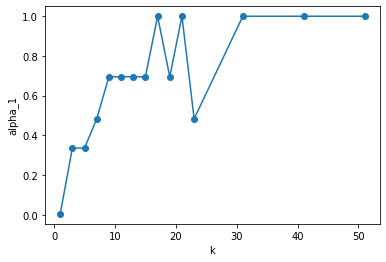

In [4]:
import matplotlib.pyplot as plt

ks = [1,3,5,7,9,11,13,15,17,19,21,23,31,41,51]
alphas = [0.00428, 0.3359818286283781, 0.3359818286283781, 0.4832930238571752, 0.6951927961775606, 0.6951927961775606,
         0.6951927961775606, 0.6951927961775606, 1.0, 0.6951927961775606, 1.0, 0.4832930238571752, 1.0, 1.0 ,1.0]

leafs = [10,70,70,60,80,70, 60,60,70,60,80,60,60,80,70]

a = pd.DataFrame()
plt.plot(ks,alphas, '-o')
plt.xlabel('k')
plt.ylabel('alpha_1')

In [5]:
for i in range(0,15):
    print(i, end = ' ')
    rt = row_tab(X_try, categorical, non_categorical, len_X_train, alphas[i], ks[i], leafs[i])
    
    a = pd.concat([a, rt], axis = 0)
#     print(a)
    

0 Wed Aug 12 18:06:16 2020
Wed Aug 12 18:08:06 2020
1 Wed Aug 12 18:08:35 2020
Wed Aug 12 18:10:14 2020
2 Wed Aug 12 18:10:34 2020
Wed Aug 12 18:13:25 2020
3 Wed Aug 12 18:14:41 2020
Wed Aug 12 18:15:59 2020
4 Wed Aug 12 18:17:02 2020
Wed Aug 12 18:19:19 2020
5 Wed Aug 12 18:19:55 2020
Wed Aug 12 18:21:43 2020
6 Wed Aug 12 18:22:21 2020
Wed Aug 12 18:28:52 2020
7 Wed Aug 12 18:29:46 2020
Wed Aug 12 18:33:16 2020
8 Wed Aug 12 18:35:40 2020
Wed Aug 12 18:37:23 2020
9 Wed Aug 12 18:38:36 2020
Wed Aug 12 18:47:01 2020
10 Wed Aug 12 18:48:04 2020
Wed Aug 12 18:49:31 2020
11 Wed Aug 12 18:50:19 2020
Wed Aug 12 18:51:41 2020
12 Wed Aug 12 18:53:11 2020
Wed Aug 12 18:54:57 2020
13 Wed Aug 12 18:56:13 2020
Wed Aug 12 19:01:37 2020
14 Wed Aug 12 19:03:00 2020
Wed Aug 12 19:04:33 2020


In [8]:
a.index = ['k = ' + str(i) for i in ks]
a.columns = ['acc_train','acc_test','rmse_train','rmse_test']
a

,acc_train,acc_test,rmse_train,rmse_test
k = 1,0.997440,0.737560,0.064992,0.667651
k = 3,0.854592,0.697415,0.557537,0.792652
k = 5,0.798720,0.677667,0.638799,0.808796
k = 7,0.758016,0.659997,0.706360,0.840695
k = 9,0.731072,0.640249,0.753912,0.858056
k = 11,0.710336,0.632844,0.781383,0.876260
k = 13,0.691328,0.622061,0.808792,0.887237
k = 15,0.679360,0.616864,0.823301,0.893512
k = 17,0.666432,0.607639,0.845317,0.904926
k = 19,0.655488,0.605431,0.863444,0.917119


In [9]:
a.to_csv('results/tab_knn_lavoro_precedente_multiclass.csv')

Text(0.5, 1.0, 'RMSE')

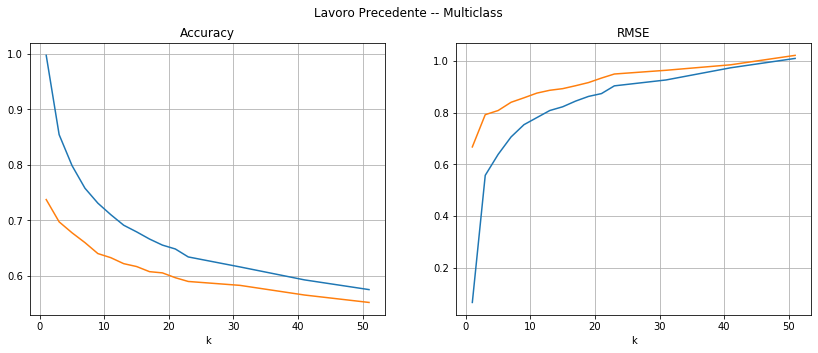

In [11]:
k = ks
table = a

plt.figure(figsize = [14,5])
plt.subplot(1,2,1)
plt.suptitle('Lavoro Precedente -- Multiclass')

plt.plot(k, table.acc_train)
plt.plot(k, table.acc_test)
plt.grid()
plt.xlabel('k')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(k,table.rmse_train)
plt.plot(k,table.rmse_test)
plt.grid()
plt.xlabel('k')
plt.title('RMSE')



# Rifaccio per K = 17,21,31,41,51 perchè valore è alpha= 1

In [ ]:
k_try = [17,21,31,41,51]

c = [0,0,0]
ham = np.linspace(1,2,20)
for i in k_try:
    print('K = ', i)
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i])
    print('\n \n Con a_ham = {}, best_leaf = {} \n \n '.format(best_alpha, best_leaf))

K =  17
Mon Aug 17 11:31:18 2020
START...
Computing Euclidean ...

 Mon Aug 17 11:31:24 2020
Adding Hamming 1 (Categorical)... alpha = 1.0
Mon Aug 17 11:31:35 2020
Start CV...
New best params found! alpha:1.0, k:17, leaf:10,
                                                        acc:  0.599104, st.error:  0.0023150844477038022,
                                                        rmse: 0.9321807375023571, st.error:  0.004875259725424781
New best params found! alpha:1.0, k:17, leaf:40,
                                                        acc:  0.60064, st.error:  0.003928317706092522,
                                                        rmse: 0.9277943836408463, st.error:  0.01262518994413616
New best params found! alpha:1.0, k:17, leaf:60,
                                                        acc:  0.6008319999999999, st.error:  0.004624636634374632,
                                                        rmse: 0.9296075124390288, st.error:  0.009244901526259057
New best pa